In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('18-concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


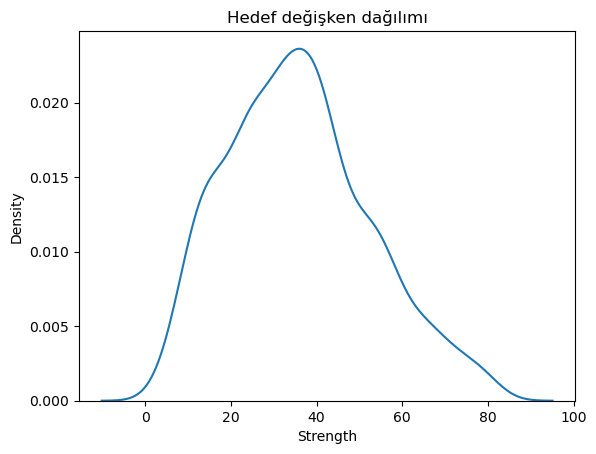

In [12]:
sns.kdeplot(data=df['Strength'])
plt.title('Hedef değişken dağılımı')
plt.show()

In [14]:
df.columns=df.columns.str.replace(' ','_')

In [16]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

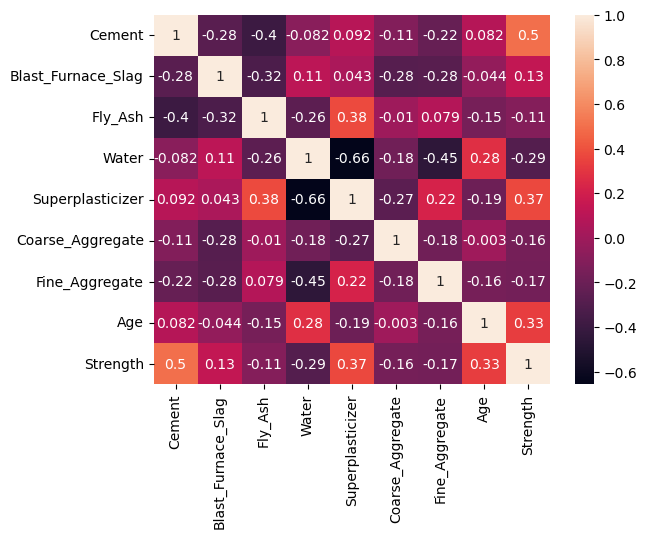

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
X=df.drop('Strength',axis=1)
y=df['Strength']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
model=GradientBoostingRegressor()

In [22]:
model.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [23]:
y_pred=model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.9299143976644655

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
params={
    'loss':['squared_error','absolute_error','huber','quantile'],
    'learning_rate':[0.01,0.1,0.5,0.6,0.7,0.9,1],
    'n_estimators':[100,125,145,150,200,250,300],
    'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'criterion':['friedman_mse','squared_error']

    
}

In [40]:
grid=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=20,n_jobs=4)

In [41]:
grid.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_distributions,"{'criterion': ['friedman_mse', 'squared_error'], 'learning_rate': [0.01, 0.1, ...], 'loss': ['squared_error', 'absolute_error', ...], 'n_estimators': [100, 125, ...], ...}"
,n_iter,20
,scoring,None
,n_jobs,4
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:
grid.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [43]:
y_pred=grid.predict(X_test)

In [44]:
r2_score(y_test,y_pred)

0.9485732908398241